<a href="https://colab.research.google.com/github/Mdsaif20/Computer-Vision-Applications-in-Transportation-Engineering/blob/main/SOCE_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((200,200))
     
     ])
test = datasets.ImageFolder("/content/drive/MyDrive/SOCE_ASS_2/test", transform=transform)
train = datasets.ImageFolder('/content/drive/MyDrive/SOCE_ASS_2/train', transform=transform)
validation = datasets.ImageFolder('/content/drive/MyDrive/SOCE_ASS_2/val', transform=transform,)

In [6]:

trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(test, batch_size=4,
                                         shuffle=False)

validationloader = torch.utils.data.DataLoader(validation, batch_size=4,
                                         shuffle=False)

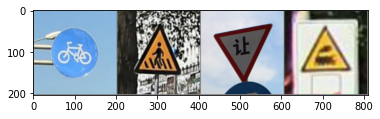

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.f=torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(3*200*200,4000)
        self.activation1=torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(4000,400)
        self.activation2=torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(400,58)
        self.activation3=torch.nn.ReLU()

    def forward(self, x):
      x=self.f(x)
      # print(x.shape)
      x=self.linear1(x)
      x=self.activation1(x)
      x=self.linear2(x)
      x=self.activation2(x)
      x=self.linear3(x)
      x=self.activation3(x)
      return x


net = Net().to(DEVICE)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005)

In [10]:

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs=inputs.to(DEVICE)
        labels=labels.to(DEVICE)
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('[%d, %5d] Train loss: %.3f' %(epoch + 1, i + 1, running_loss ))
    running_loss = 0.0
    for i, data in enumerate(validationloader, 0):
        # get the inputs
        inputs, labels = data
        inputs=inputs.to(DEVICE)
        labels=labels.to(DEVICE)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # print statistics
        running_loss += loss.item()
    print('[%d, %5d] validation loss: %.3f' %(epoch + 1, i + 1, running_loss ))
    running_loss = 0.0

print('Finished Training')

[1,   829] Train loss: 1684.365
[1,   101] validation loss: 111.708
[2,   829] Train loss: 670.236
[2,   101] validation loss: 93.340
[3,   829] Train loss: 419.383
[3,   101] validation loss: 66.925
[4,   829] Train loss: 305.541
[4,   101] validation loss: 59.237
[5,   829] Train loss: 248.656
[5,   101] validation loss: 42.526
[6,   829] Train loss: 210.370
[6,   101] validation loss: 36.919
[7,   829] Train loss: 200.612
[7,   101] validation loss: 35.254
[8,   829] Train loss: 172.749
[8,   101] validation loss: 32.141
[9,   829] Train loss: 154.097
[9,   101] validation loss: 59.575
[10,   829] Train loss: 161.682
[10,   101] validation loss: 33.550
[11,   829] Train loss: 152.639
[11,   101] validation loss: 28.011
[12,   829] Train loss: 146.655
[12,   101] validation loss: 28.184
[13,   829] Train loss: 134.753
[13,   101] validation loss: 30.226
[14,   829] Train loss: 139.470
[14,   101] validation loss: 28.407
[15,   829] Train loss: 125.348
[15,   101] validation loss: 26.

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(DEVICE)
        labels=labels.to(DEVICE)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 92 %


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images=images.to(DEVICE)
        labels=labels.to(DEVICE)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the validation images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the validation images: 93 %
